### Intro to Conv2D Pooling
optimizer = optimizers.Adam(lr=0.03)  
loss_fun = losses.CategoricalCrossentropy(from_logits=True)  
model.compile(loss=loss_func, optimizer=optimizer, metrics=["accuracy"])  
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=3, verbose=1,validation_data=(x_test,y_test))  
model.trainable_variables  

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models,optimizers,Sequential,metrics,losses, utils

import sys,os
print(tf.__version__)
print(sys.version)


#class_names = ["airplain","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
class_names = ["飛機","汽車","鳥","貓","鹿","狗","青蛙","馬","船","卡車"]


2.0.0
3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]


In [2]:
from tensorflow.keras import utils
def data_normalize(train, test):
    (x_train,y_train) = train
    (x_test,y_test) = test
    x_train = x_train.astype(np.float32) / 255.
    x_test = x_test.astype(np.float32) / 255.
    y_train = utils.to_categorical(y_train).astype(np.int32)
    y_test = utils.to_categorical(y_test).astype(np.int32)
    
    return (x_train,y_train),(x_test,y_test)
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
(x_train,y_train),(x_test,y_test) = data_normalize((x_train,y_train),(x_test,y_test))
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


青蛙 tf.Tensor(6, shape=(), dtype=int64)


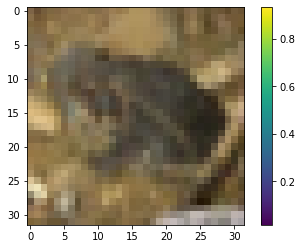

In [3]:
index = np.random.randint(100)
label = tf.argmax(y_train[index], axis=0)
print(class_names[label],label)
plt.figure()
plt.imshow(x_train[index])
plt.colorbar()
plt.show()

### Intro to Conv2D Pooling

In [4]:
#x = tf.expand_dims(x_train[0],axis=0)
x = x_train[0:1]
input_shape= (None,32,32,3)
conv_1 = layers.Conv2D(filters=1, kernel_size=3,padding='same',activation="relu")
conv_1.build(input_shape=input_shape)
outputs_1 = conv_1(x)
conv_2 = layers.Conv2D(filters=13, kernel_size=3,padding='same',activation="relu")
conv_2.build(input_shape=input_shape)
outputs_2 = conv_2(x)
print("filters=1 定義輸出尾數維度")
print("filters=1 ",input_shape,"輸出變成",outputs_1.shape)
print("filters=13",input_shape,"輸出變成",outputs_2.shape)

filters=1 定義輸出尾數維度
filters=1  (None, 32, 32, 3) 輸出變成 (1, 32, 32, 1)
filters=13 (None, 32, 32, 3) 輸出變成 (1, 32, 32, 13)


In [5]:
conv_1 = layers.Conv2D(filters=3, kernel_size=3,strides=1,padding='valid',activation="relu")
outputs_1 = conv_1(x)
conv_2 = layers.Conv2D(filters=3, kernel_size=3,strides=1,padding='same',activation="relu")
outputs_2 = conv_2(x)
print("padding 定義邊緣填充, valid 邊緣捲積不足的部分，忽略")
print("padding 定義邊緣填充, same 邊緣捲積不足的部分，填充補齊")
print("32 - kernel_size = 29 + 1 = 30")
print("padding='valid' ,\toutputs",outputs_1.shape)
print("padding='same'  ,\toutputs",outputs_2.shape)
print("32 - kernel_size = 29 + kernel_size = 32")
print()
print("strides 定義捲積核位移尺度，預設 1")
conv_1 = layers.Conv2D(filters=3, kernel_size=3,strides=5,padding='same',activation="relu")
outputs_1 = conv_1(x)
conv_2 = layers.Conv2D(filters=3, kernel_size=3,strides=2,padding='same',activation="relu")
outputs_2 = conv_2(x)
print("32 - kernel_size = 29, 29/5= 5餘4")
print("outputs = 5 + 1(第一捲積) + 1(剩餘捲積) = 7")
print("strides=5,\toutputs",outputs_1.shape)
print("strides=2,\toutputs",outputs_2.shape)
print("32 - kernel_size = 29, 29/2= 14餘1")
print("outputs = 14 + 1(第一捲積) + 1(剩餘捲積) = 16")

padding 定義邊緣填充, valid 邊緣捲積不足的部分，忽略
padding 定義邊緣填充, same 邊緣捲積不足的部分，填充補齊
32 - kernel_size = 29 + 1 = 30
padding='valid' ,	outputs (1, 30, 30, 3)
padding='same'  ,	outputs (1, 32, 32, 3)
32 - kernel_size = 29 + kernel_size = 32

strides 定義捲積核位移尺度，預設 1
32 - kernel_size = 29, 29/5= 5餘4
outputs = 5 + 1(第一捲積) + 1(剩餘捲積) = 7
strides=5,	outputs (1, 7, 7, 3)
strides=2,	outputs (1, 16, 16, 3)
32 - kernel_size = 29, 29/2= 14餘1
outputs = 14 + 1(第一捲積) + 1(剩餘捲積) = 16


In [6]:
conv_1 = layers.Conv2D(filters=3, kernel_size=3,strides=1,padding='same',activation="relu")
pool_1 = layers.MaxPool2D(pool_size=2,strides=3,padding='same')
outputs_x = conv_1(x)
outputs_1 = pool_1(outputs_x)
print("池化層同樣 pooling")
print("32 - pool_size = 30, 30/3= 10")
print("outputs = 10 + 1(第一捲積) = 11")
print("strides=3,\toutputs",outputs_1.shape)

池化層同樣 pooling
32 - pool_size = 30, 30/3= 10
outputs = 10 + 1(第一捲積) = 11
strides=3,	outputs (1, 11, 11, 3)


In [7]:
flatten = layers.Flatten()
outputs_2 = flatten(outputs_1)
print("layers.Flatten()")
print("input_shape (1,11,11,3) => 壓平")
print("outputs (1, 11*11*3) =",outputs_2.shape)

layers.Flatten()
input_shape (1,11,11,3) => 壓平
outputs (1, 11*11*3) = (1, 363)


In [8]:
# preds tf.Tensor([6 6 6 6 6 6 6 6 6 6], shape=(10,), dtype=int64) 
# 要用 layers.Dropout 改善
class VGG16(models.Model):
    def __init__(self):
        super(VGG16, self).__init__()
        self.conv_1 = layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", name="conv_1")
        self.pool_1 = layers.MaxPool2D(pool_size=2, strides=2, padding="same", name="pool_1")
        self.conv_2 = layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", name="conv_2")
        self.pool_2 = layers.MaxPool2D(pool_size=2, strides=2, padding="same", name="pool_2")
        self.conv_3 = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", name="conv_3")
        self.pool_3 = layers.MaxPool2D(pool_size=2, strides=2, padding="same", name="pool_3")
        self.conv_4 = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", name="conv_4")
        self.pool_4 = layers.MaxPool2D(pool_size=2, strides=2, padding="same", name="pool_4")
        self.flatten = layers.Flatten(name="flaten")
        self.dd_1 = layers.Dense(units=256, activation="relu", name="dd_1")
        self.dd_2 = layers.Dense(units=128, activation="relu", name="dd_2")
        self.dd_3 = layers.Dense(units=32, activation="relu", name="dd_3")
        self.dd_4 = layers.Dense(units=10, activation="softmax", name="dd_4")
        self.drop_1 = layers.Dropout(rate=0.3)
        self.drop_2 = layers.Dropout(rate=0.3)
        self.drop_3 = layers.Dropout(rate=0.3)
        self.drop_4 = layers.Dropout(rate=0.3)
        self.model_seq = self.create_model_seq()
        
    def call(self, inputs):
        x = self.conv_1(inputs)
        x = self.pool_1(x)      
        #print("pool_1 ops",x)          
        x = self.conv_2(x)
        x = self.pool_2(x)       
        x = self.drop_1(x)
        #print("pool_2 ops",x)        
        x = self.conv_3(x)
        x = self.pool_3(x)
        #print("pool_3 ops",x)        
        x = self.conv_4(x)
        x = self.pool_4(x)
        x = self.drop_2(x)
        #print("pool_4 ops",x)
        x = self.flatten(x)
        #print("flatten ops",x)
        x = self.dd_1(x)
        x = self.drop_3(x)
        #print("dd_1 ops",x)
        x = self.dd_2(x)
        #print("dd_2 ops",x)
        x = self.dd_3(x)
        x = self.drop_4(x)
        #print("dd_3 ops",x)
        x = self.dd_4(x)
        #print("dd_4 ops",x)
        return x
        
    def create_model_seq(self):
        model = models.Sequential()
        model.add(self.conv_1)
        model.add(self.pool_1)
        model.add(self.conv_2)
        model.add(self.pool_2)
        model.add(self.conv_3)
        model.add(self.pool_3)
        model.add(self.conv_4)
        model.add(self.pool_4)
        model.add(self.flatten)
        model.add(self.dd_1)
        model.add(self.dd_2)
        model.add(self.dd_3)
        model.add(self.dd_4)
        return model

model = VGG16()
model.model_seq.build(input_shape=(None,32,32,3))
model.model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              multiple                  224       
_________________________________________________________________
pool_1 (MaxPooling2D)        multiple                  0         
_________________________________________________________________
conv_2 (Conv2D)              multiple                  1168      
_________________________________________________________________
pool_2 (MaxPooling2D)        multiple                  0         
_________________________________________________________________
conv_3 (Conv2D)              multiple                  4640      
_________________________________________________________________
pool_3 (MaxPooling2D)        multiple                  0         
_________________________________________________________________
conv_4 (Conv2D)              multiple                  1

In [9]:
model.build(input_shape=(None,32,32,3))

pool_1 ops Tensor("pool_1/MaxPool:0", shape=(None, 16, 16, 8), dtype=float32)  
pool_2 ops Tensor("pool_2/MaxPool:0", shape=(None, 8, 8, 16), dtype=float32)  
pool_3 ops Tensor("pool_3/MaxPool:0", shape=(None, 4, 4, 32), dtype=float32)  
pool_4 ops Tensor("pool_4/MaxPool:0", shape=(None, 2, 2, 64), dtype=float32)  
flatten ops Tensor("flaten/Reshape:0", shape=(None, 256), dtype=float32)  
dd_1 ops Tensor("dd_1/Relu:0", shape=(None, 256), dtype=float32)  
dd_2 ops Tensor("dd_2/Relu:0", shape=(None, 128), dtype=float32)  
dd_3 ops Tensor("dd_3/Relu:0", shape=(None, 32), dtype=float32)  
dd_4 ops Tensor("dd_4/Relu:0", shape=(None, 10), dtype=float32)  

In [10]:
batch_size = 256
optimizer = optimizers.Adam(lr=0.01)
loss_func = losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_func, optimizer=optimizer, metrics=["accuracy"])
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=3, verbose=1,validation_data=(x_test,y_test))
history.history.keys()

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 20s 392us/sample - loss: 2.2629 - accuracy: 0.1628 - val_loss: 2.2296 - val_accuracy: 0.2067
Epoch 2/3
50000/50000 [==============================] - 20s 397us/sample - loss: 2.2385 - accuracy: 0.2064 - val_loss: 2.1978 - val_accuracy: 0.2520
Epoch 3/3
50000/50000 [==============================] - 17s 339us/sample - loss: 2.2801 - accuracy: 0.1556 - val_loss: 2.2528 - val_accuracy: 0.1744


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

tf.Tensor([9 9 3 3 5 9 3 3 3 3], shape=(10,), dtype=int64)


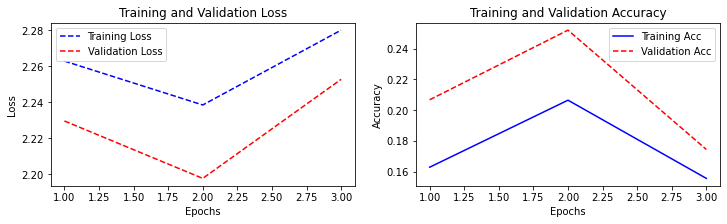

In [11]:
preds = model.predict(x_test[100:110])
preds = tf.argmax(preds, axis=1)
print(preds)

def visual_train_status(history):
        plt.figure(figsize=(12,3))
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss)+1)  
        plt.subplot(1,2,1)
        plt.plot(epochs, loss, "b--", label="Training Loss")
        plt.plot(epochs, val_loss, "r--", label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        # 顯示訓練和驗證準確度
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        epochs = range(1, len(acc)+1)
        plt.subplot(1,2,2)
        plt.plot(epochs, acc, "b-", label="Training Acc")
        plt.plot(epochs, val_acc, "r--", label="Validation Acc")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
        
visual_train_status(history)

In [12]:
ds_train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
ds_train = ds_train.shuffle(10000).batch(batch_size)
ds_test = tf.data.Dataset.from_tensor_slices((x_test,y_test))
ds_test = ds_test.shuffle(10000).batch(batch_size)

data_iter = iter(ds_train)
samples = next(data_iter)
print(samples[0].shape,samples[1].shape)


def train(epochs):
    for epoch in range(epochs):
        for step, (x,y) in enumerate(ds_train):        
            with tf.GradientTape() as tape:
                logits = model(x) # shape=(256, 10)                
                #loss = loss_func(logits) # shape=()
                loss = tf.keras.losses.categorical_crossentropy(y, logits,from_logits=True) 
                loss = tf.reduce_mean(loss)
                #print(logits)
                #print(loss)
            #grads = tape.gradient(loss, model.trainable_variables)
            #optimizer.apply_gradients(zip(loss, model.trainable_variables))
            if (step+1) % 30 == 0:
                print("Epoch:",epoch,"\tStep:",(step+1),"\tloss:%.6f"%loss)# 
                
    print("finnish training")
            
train(1)

(256, 32, 32, 3) (256, 10)
Epoch: 0 	Step: 30 	loss:2.272143
Epoch: 0 	Step: 60 	loss:2.261462
Epoch: 0 	Step: 90 	loss:2.252981
Epoch: 0 	Step: 120 	loss:2.271910
Epoch: 0 	Step: 150 	loss:2.260746
Epoch: 0 	Step: 180 	loss:2.259706
finnish training


In [13]:
def test(epochs):
    for epoch in range(epochs):
        for step, (x,y) in enumerate(ds_test):
            logits = model(x)            
            #probs = tf.nn.softmax(logits, axis=1)            
            pred = tf.argmax(logits, axis=1)            
            y = tf.argmax(y, axis=1)            
            correct = tf.equal(pred,y)
            correct = tf.cast(correct, dtype=tf.int32)            
            result = tf.reduce_sum(correct)
            
            total_loss = int(result)            
            batch_sz = x.shape[0]
        acc = total_loss / batch_sz
        print(epoch,"acc:",acc)
        
    print("Finishing testing")
        
test(3)

0 acc: 0.1875
1 acc: 0.125
2 acc: 0.125
Finishing testing
